In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## MGFs, the Normal, and the CLT ##

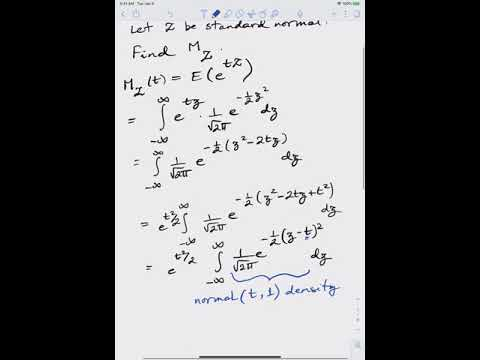

In [2]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('SXyYS0ztJ6U')

Let $Z$ be standard normal. Then the mgf of $Z$ is given by

$$
M_Z(t) ~ = ~ e^{t^2/2} ~~~ \text{for all } t
$$

To see this, just work out the integral:

$$
\begin{align*}
M_Z(t) ~ &= ~ \int_{-\infty}^\infty e^{tz} \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2} dz \\ \\
&= ~ \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(z^2 - 2tz)} dz \\ \\
&= ~ e^{t^2/2} \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(z^2 - 2tz + t^2)} dz \\ \\
&= ~ e^{t^2/2} \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(z- t)^2} dz \\ \\
&= ~ e^{t^2/2}
\end{align*}
$$

because the integral is $1$. It is the normal $(t, 1)$ density integrated over the whole real line.

### Linear Transformation ###
It's handy to note that moment generating functions behave well under linear transformation.

$$
M_{aX+b}(t) ~ = ~ E(e^{t(aX + b)}) ~ = ~ e^{bt}E(e^{atX}) ~ = ~ e^{bt}M_X(at)
$$

### Normal $(\mu, \sigma^2)$ ###

Since a normal $(\mu, \sigma^2)$ variable can be written as $\sigma Z + \mu$ where $Z$ is standard normal, its m.g.f. is

$$
M_{\sigma Z + \mu} (t) ~ = ~ e^{\mu t}M_Z(\sigma t) ~ = ~ e^{\mu t +\sigma^2 t^2/2}
$$

Details aside, what this formula is saying is that if a moment generating function is $\exp(c_1t + c_2t^2)$ for any constant $c_1$ and any positive constant $c_2$, then it is the moment generating function of a normally distributed random variable.

```{admonition} Quick Check
The random variable $X$ has mgf $M_X(t) = e^{10t^2}$ for all $t$. What is the distribution of $X$?

```

```{admonition} Answer
:class: dropdown
normal $(0, 20)$

```

### Sums of Independent Normal Variables ###
We can now show that sums of independent normal variables are normal.

Let $X$ have normal $(\mu_X, \sigma_X^2)$ distribution, and let $Y$ independent of $X$ have normal $(\mu_Y, \sigma_Y^2)$ distribution. Then

$$
M_{X+Y} (t) = e^{\mu_X t + \sigma_X^2 t^2/2} \cdot e^{\mu_Y t + \sigma_Y^2 t^2/2} = e^{(\mu_X + \mu_Y)t + (\sigma_X^2 + \sigma_Y^2)t^2/2}
$$

That's the m.g.f. of the normal distribution with mean $\mu_X + \mu_Y$ and variance $\sigma_X^2 + \sigma_Y^2$.

### "Proof" of the Central Limit Theorem ###
Another important reason for studying mgf's is that they can help us identify the limit of a sequence of distributions. 

The main example of convergence that we have seen is the Central Limit Theorem. Now we can indicate a proof.

Let $X_1, X_2, \ldots$ be i.i.d. random variables with expectation $\mu$ and SD $\sigma$. For every $n \ge 1$ let $S_n = X_1 + X_2 + \cdots + X_n$.

The Central Limit Theorem says that for large $n$, the distribution of the standardized sum

$$
S_n^* = \frac{S_n - n\mu}{\sqrt{n}\sigma}
$$

is approximately standard normal.

To show this, we will assume a major result whose proof is well beyond the scope of this class. Suppose $Y_1, Y_2, \ldots$ are random variables and we want to show that the the distribution of the $Y_n$'s converges to the distribution of some random variable $Y$. The result says that it is enough to show that the mgf's of the $Y_n$'s converge to the mgf of $Y$.  

The result requires a careful statement and the proof requires considerable attention to detail. We won't go into that in this course. Instead we'll just point out that it should seem reasonable. Since mgf's determine distributions, it's not difficult to accept that if two mgf's are close to each other then the corresponding distributions should also be close to each other.

Let's use this result to "prove" the CLT. The quotes are because we will use the above result without proof, and also because the argument below involves some hand-waving about approximations.

First, write the standardized sum in terms of the standardized $X$'s.

$$
\begin{align*}
S_n^* = \frac{S_n - n\mu}{\sqrt{n}\sigma} = \sum_{i=1}^n \frac{1}{\sqrt{n}} \big{(} \frac{X_i - \mu}{\sigma} \big{)} = \sum_{i=1}^n \frac{1}{\sqrt{n}} X_i^*
\end{align*}
$$

where for each $i$, the random variable $X_i^*$ is $X_i$ in standard units. 

The random variables $X_i^*$ are i.i.d., so let $M_{X^*}$ denote the mgf of any one of them. By the linear transformation property proved above, the mgf of each $\frac{1}{\sqrt{n}}X_i^*$ is given by

$$
M_{\frac{1}{\sqrt{n}}X_i^*} (t) = M_{X^*} (t/\sqrt{n})
$$

Therefore

$$
\begin{align*}
M_{S_n^*} (t) &= \big{(} M_{X^*}(t/\sqrt{n}) \big{)}^n \\ \\
&= \Big{(} 1 + \frac{t}{\sqrt{n}} \cdot \frac{E(X^*)}{1!} + \frac{t^2}{n} \cdot \frac{E({X^*}^2)}{2!} + \frac{t^3}{n^{3/2}} \cdot \frac{E({X^*}^3)}{3!} + \cdots \Big{)}^n \\ \\
&\approx ~ \Big{(} 1 + \frac{t^2}{2n}\Big{)}^n ~~~ \text{for large } n\\ \\
\end{align*}
$$

by ignoring small terms and using the fact that for any standardized random variable $X^*$ we have $E(X^*) = 0$ and $E({X^*}^2) = 1$.

Thus for large $n$,

$$
M_{S_n^*} (t) \approx \Big{(} 1 + \frac{t^2}{2n}\Big{)}^n 
\to e^{t^2/2} \text{as } n \to \infty
$$

The limit is the moment generating function of the standard normal distribution. 